  0%|          | 0/2748 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

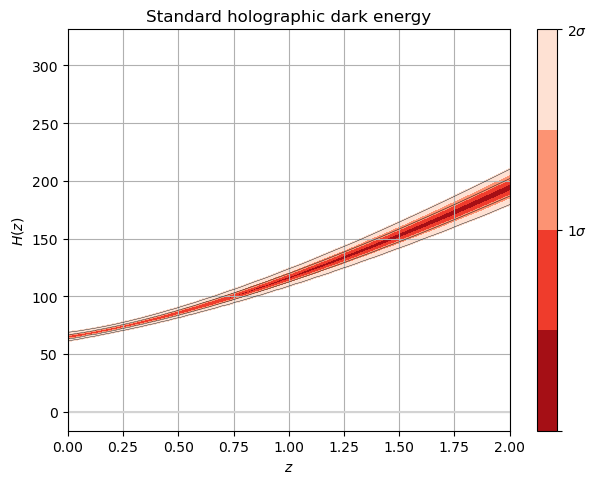

In [25]:
''' 
In this Notebook, we use the fgivenx package for plotting posteriors of functions, using our chains for each 
holographic model. 
For more information about  this package, visit: https://github.com/handley-lab/fgivenx

'''


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

# We stard with the standar holographic dark energy model 
# In this case we just plot the EoS and H(z) for all models.


file_root = '/home/alfonsozapata/SimpleMC/simplemc/chains/HDE/'
file_root += 'HDE_phy_SN+HD+BBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'h', 'c'], file_root)

def HDE(z, theta):
    samples = theta
    Om0 = theta[0]
    H0 = 100 * theta[1]
    c_value = theta[2]
    Ode0 = 1 - Om0
    #print(H0)
    z_rs = np.linspace(0, 3, 100)

    def model_hde(Omega, z):
        dOmega = (Omega * (Omega - 1) / (z + 1)) * ((2 * (np.sqrt(Omega)) / c_value) + 1)
        return dOmega

    sol_de = np.reshape(odeint(model_hde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_de, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        w =  -1 / 3 - (2*np.sqrt(Om_de(z))) / (3*c_value)
        return w 
    #plt.plot(z_rs,w_eos(z_rs))
    #return w_eos(z)
    return H_z(z)

z = np.linspace(0.0000, 3, 100)
cbar = plot_contours(HDE, z, samples, weights=weights, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.0)
plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 2.0)
#plt.ylabel(r'$\omega(z)$')
plt.ylabel(r'$H(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Standard holographic dark energy')
plt.grid()
plt.show()


  0%|          | 0/1139 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

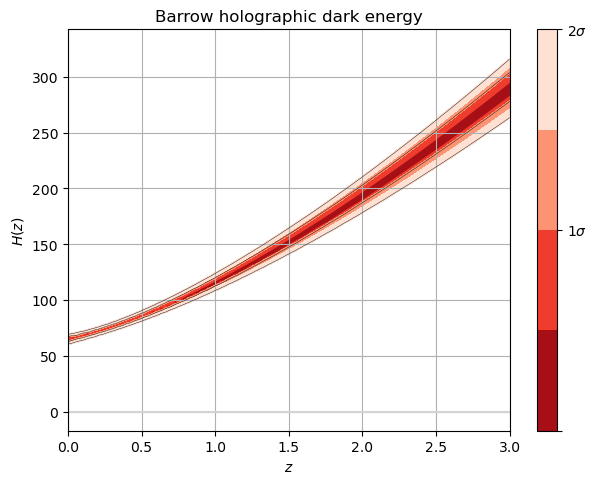

In [24]:
# Barrow model 

file_root = '/home/alfonsozapata/SimpleMC/simplemc/chains/Barrow/300test/'
file_root += 'BHDE_phy_SN+HD+BBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'h','c','b'], file_root)

def BHDE(z, theta):
    samples = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    b_value = theta[3]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_bhde(Omega, z):
        x = np.log(1./(1+z))
        Q = ((c_value**2)*np.exp(3*x))/((H0**2)*Om0)
        # Compute common terms
        term1 = - (Omega*(1 - Omega))/(1+z)
        sqrt_Omega_DE = np.sqrt(Omega)
        term2_base = (c_value**2)**(-0.5)
        fraction_Q_Omega = Q * (1 - Omega) / Omega
    
    # Exponents
        exponent1 = (b_value) / (2 * (b_value - 2))
        exponent2 = 0
    
    # Calculate individual components of the right-hand side
        rhs1 = sqrt_Omega_DE * term2_base * ((fraction_Q_Omega)**exponent1)*(2 - b_value)
        rhs2 = 0
        rhs3 = b_value + 1
    
    # Combine all terms to calculate dOmega_DE_dz
        rhs = rhs1 + rhs2 + rhs3
        dOmega_DE_dz = term1 * rhs
    
        return dOmega_DE_dz


    sol_de = np.reshape(odeint(model_bhde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_de, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        x = np.log(1./(1+z))
        Q = ((c_value**2)*np.exp(3*x))/((H0**2)*Om0)
        w =  - (b_value +1)/3 + (((b_value-2)*np.sqrt(Om_de(z)))/3)*((c_value**2)**(-0.5))*((Q*(1-Om_de(z))/Om_de(z))**(b_value/(2*(b_value-2))))
        return w 
    #plt.plot(z_rs,w_eos(z_rs))
    return H_z(z)
    #return H_z(z)

z = np.linspace(0.0000, 3, 100)
#cbar = plot_contours(BHDE, z, samples, weights=weights, contour_line_levels=[1, 2],colors=plt.cm.Greens_r)
cbar = plot_contours(BHDE, z, samples, weights=weights, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.0)
plt.plot(z, lcdm, color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 3.0)
#plt.ylabel(r'$\omega(z)$')
plt.ylabel(r'$H(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Barrow holographic dark energy')
plt.grid()
plt.show()


  0%|          | 0/1151 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

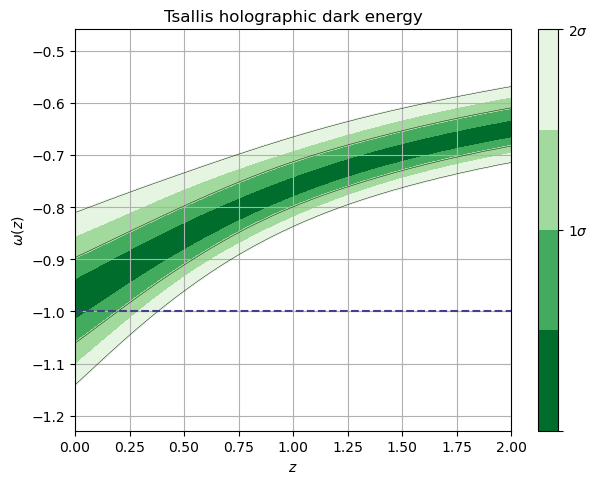

In [85]:
# Tsallis model 

file_roott = '/home/alfonsozapata/SimpleMC/simplemc/chains/Tsallis/300test/'
file_roott += 'THDE_phy_SN+HD+BBAO_nested_multi'

samplest, weightst = samples_from_getdist_chains(['Om', 'h','c','s'], file_roott)

def THDE(z, theta):
    samplest = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    s_value = theta[3]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_bhde(Omega, z):
        b =  2*s_value - 2 
        x = np.log(1./(1+z))
        Q = ((c_value**2)*np.exp(3*x))/((H0**2)*Om0)
        # Compute common terms
        term1 = - (Omega*(1 - Omega))/(1+z)
        sqrt_Omega_DE = np.sqrt(Omega)
        term2_base = (c_value**2)**(-0.5)
        fraction_Q_Omega = Q * (1 - Omega) / Omega
    
    # Exponents
        exponent1 = (b) / (2 * (b - 2))
        exponent2 = 0
    
    # Calculate individual components of the right-hand side
        rhs1 = sqrt_Omega_DE * term2_base * ((fraction_Q_Omega)**exponent1)*(2 - b)
        rhs2 = 0
        rhs3 = b + 1
    
    # Combine all terms to calculate dOmega_DE_dz
        rhs = rhs1 + rhs2 + rhs3
        dOmega_DE_dz = term1 * rhs
    
        return dOmega_DE_dz


    sol_de = np.reshape(odeint(model_bhde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_de, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        b = 2*s_value - 2
        x = np.log(1./(1+z))
        Q = ((c_value**2)*np.exp(3*x))/((H0**2)*Om0)
        w =  - (b +1)/3 + (((b-2)*np.sqrt(Om_de(z)))/3)*((c_value**2)**(-0.5))*((Q*(1-Om_de(z))/Om_de(z))**(b/(2*(b-2))))
        return w 
    #plt.plot(z_rs,w_eos(z_rs))
    #return H_z(z)
    return w_eos(z)

z = np.linspace(0.0000, 3, 100)
cbar = plot_contours(THDE, z, samplest, weights=weightst, contour_line_levels=[1, 2],colors=plt.cm.Greens_r)
#cbar = plot_contours(THDE, z, samplest, weights=weightst, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, -1.0)
plt.plot(z, lcdm,linestyle='--',color='darkslateblue')
#plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 2.0)
plt.ylabel(r'$\omega(z)$')
#plt.ylabel(r'$H(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Tsallis holographic dark energy')
plt.grid()
plt.show()


  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

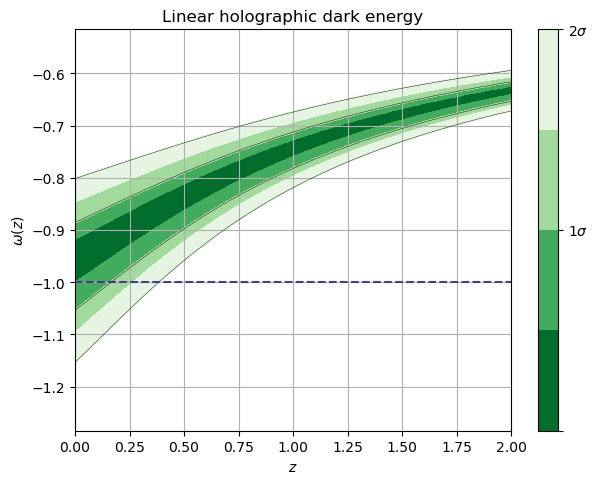

In [106]:
'''
Linear exponent 
f(z) = a + bz
'''

file_rootl = '/home/alfonsozapata/SimpleMC/simplemc/chains/Linear/BLHDE/300test2/'
file_rootl += 'LHDE_phy_SN+HD+BBAO_nested_multi'

samplesl, weightsl = samples_from_getdist_chains(['Om', 'h','c','b','a'], file_rootl)

def LHDE(z, theta):
    samplesl = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    b_value = theta[3]
    a_value = theta[4]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_lhde(Omega,z):
        x = np.log(1./(1+z))
        C = 3*(c_value**2)
        Q = (C*np.exp(3*x))/(3*(H0**2)*Om0)
        # Compute common terms
        term1 = - (Omega* (1 - Omega))/(1+z)
        sqrt_Omega_DE = np.sqrt(Omega)
        term2_base = (C / 3 )**(-0.5)
        fraction_Q_Omega = Q * (1 - Omega) / Omega
    
    # Exponents
        exponent1 = (a_value + b_value*z) / (2 * (a_value + b_value*z - 2))
        exponent2 = (-b_value * (1 + z)) / (a_value + b_value*z - 2)
    
    # Calculate individual components of the right-hand side
        rhs1 = sqrt_Omega_DE * term2_base * ((fraction_Q_Omega)**exponent1)*(2 - a_value - b_value* z)
        rhs2 = np.log(fraction_Q_Omega**exponent2)
        rhs3 = a_value + b_value*z + 1
    
    # Combine all terms to calculate dOmega_DE_dz
        rhs = rhs1 + rhs2 + rhs3
        dOmega_DE_dz = term1 * rhs
    
        return dOmega_DE_dz


    sol_del = np.reshape(odeint(model_lhde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_del, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        x = np.log(1./(1+z))
        Q = ((c_value**2)*np.exp(3*x))/((H0**2)*Om0)
    
    # Exponents
        exponent1 = (a_value + b_value*z)/(2*(a_value + b_value*z - 2))
        exponent2 = 1./(2 - a_value - b_value* z)
    
    
    # Combine all terms to calculate w_DE
        w_DE = -(a_value + b_value* z + 1)/3 + ((a_value + b_value*z - 2)*np.sqrt(Om_de(z))/3)*((c_value**2)**(-0.5))*((Q*(1 - Om_de(z))/Om_de(z))**exponent1)+ ((1 + z)*b_value/3)*np.log((Q*(1-Om_de(z))/Om_de(z))**exponent2)
        return w_DE 

    return w_eos(z)

z = np.linspace(0.0000, 3, 100)
cbar = plot_contours(LHDE, z, samplesl, weights=weightsl, contour_line_levels=[1, 2],colors=plt.cm.Greens_r)
#cbar = plot_contours(THDE, z, samplest, weights=weightst, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, -1.0)
plt.plot(z, lcdm,linestyle='--',color='darkslateblue')
#plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 2.0)
#plt.ylim(-2.5,1.0)
plt.ylabel(r'$\omega(z)$')
#plt.ylabel(r'$H(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Linear holographic dark energy')
plt.grid()
plt.show()



In [ ]:
    :param varyc: variable w0 parameter

"""


def __init__(self,varyc = True,varyb = True,varya = True ):
    # Holographic parameter
    self.c_par = Parameter("c", 1.0780, 0.1, (0.5, 2.0), "c")
    self.b_par = Parameter("b",0.0,0.01,(-0.5,0.0),  "b")
    self.a_par = Parameter("a",0.0,0.01,(0,0.5),  "a")
    self.varyc  = varyc 
    self.varyb  = varyb
    self.varya  = varya 

    self.c  = self.c_par.value
    self.b  = self.b_par.value 
    self.a  = self.a_par.value 

          # This value is quite related to the initial z
    self.zini = 3
    #self.avals = np.linspace(1./(1+self.zini), 1, 300)
    self.zvals    = (0,3)
    self.t_eval   =  np.linspace(0, self.zini, 50)
    #self.z_int = np.linspace(0, 2, 500)

    LCDMCosmology.__init__(self)
    self.updateParams([])


# my free parameters. We add Ok on top of LCDM ones (we inherit LCDM)
def freeParameters(self):
    l = LCDMCosmology.freeParameters(self)
    #if (self.varyOk): l.append(Ok_par)
    if (self.varyc):  l.append(self.c_par)
    if (self.varyb):  l.append(self.b_par)
    if (self.varya):  l.append(self.a_par)
    return l


def updateParams(self, pars):
    ok = LCDMCosmology.updateParams(self, pars)
    if not ok:
        return False
    for p in pars:
        if p.name == "c":
            self.c = p.value  
        elif p.name == "b":
           self.b = p.value
        elif p.name == "a":
           self.a = p.value 
        

    self.initialize()
    return True


def RHS_hde(self,z,Omega):
    x = np.log(1./(1+z))
    H0 = (100*self.h)
    Q = ((self.c**2)*np.exp(3*x))/((H0**2)*self.Om)
# Exponents
    exponent1 = (self.a + self.b*z) / (2 * (self.a + self.b*z - 2))
    exponent2 = (-self.b * (1 + z)) / (self.a + self.b*z - 2)

# Calculate individual components of the right-hand side

# Combine all terms to calculate dOmega_DE_dz
    dOmega_DE_dz = - ((Omega*(1 - Omega))/(1+z))#*(np.sqrt(Omega)*((self.c**2)**(-0.5))*((Q*(1-Omega)/Omega)**exponent1)*(2-self.a-self.b*z) )#+ np.log((Q*(1-Omega)/Omega)**exponent2) + self.a + self.b*z )
   
    return dOmega_DE_dz

def EoS(self,z,Omega):
    x = np.log(1./(1+z))
    H0 = (100*self.h)
    Q = ((self.c**2)*np.exp(3*x))/((H0**2)*self.Om)

# Exponents
    exponent1 = (self.a + self.b*z)/(2*(self.a + self.b*z - 2))
    exponent2 = 1./(2 - self.a - self.b* z)


# Combine all terms to calculate w_DE
    w_DE = -(self.a + self.b* z + 1)/3 + ((self.a + self.b*z - 2)*np.sqrt(Omega)/3)*((self.c**2)**(-0.5))*((Q*(1 - Omega)/Omega)**exponent1)+ ((1 + z)*self.b/3)*np.log((Q*(1-Omega)/Omega)**exponent2)

    return w_DE 


def initialize(self):
    
    Ode0 = [1 - self.Om]
    #result_E = odeint(self.RHS_hde, Ode0, self.zvals)
    result_E   = solve_ivp(self.RHS_hde,self.zvals, Ode0, t_eval=self.t_eval, method='RK45', atol=1e-12, rtol=1e-12)
    #self.Ode = result_E.self.Ode[0]
    self.Ode = interp1d(self.zvals, result_E[:,0])
    #result_E_re = result_E.reshape(-1)
    #Eos_linear = self.EoS(result_E_re,self.zvals)
    #print(Eos_linear[0])
    #plt.plot(self.zvals,Eos_linear)
    #plt.grid(True)
    #plt.xlabel('z')
    #plt.ylabel('$\omega_{de}$')
    #print(result_E[:,0])
    #f = self.Ode(self.z_int)
    #print('Omega_de(z=0) para cada valor usando interp1d',f[0])
    #self.Omega_hde = interp1d(self.avals, Ode[:, 0])
    return True



# this is relative hsquared as a function of a
## i.e. H(z)^2/H(z=0)^2
def RHSquared_a(self, a):
    z = 1./a-1
    hubble = (self.Om/a**3)/(1-self.Ode(z))
    #print(100*self.h*hubble)
    #print(self.b)
    #f1 = (self.Om/a[0]**3)/(1-self.Ode(z)[0])
    #print(100*self.h*hubble)      
    return hubble






  0%|          | 0/1369 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

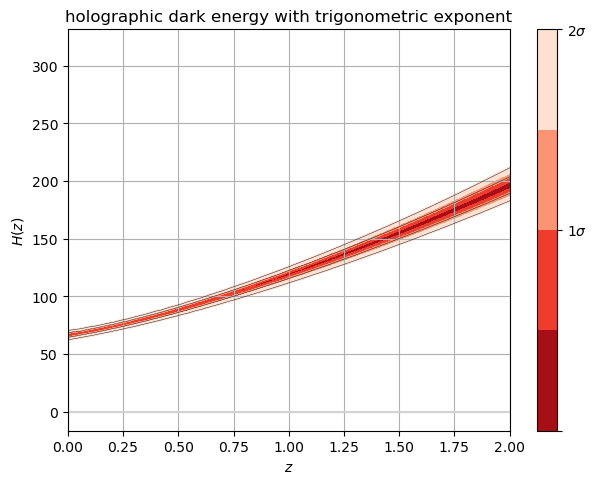

In [65]:
'''
Trigonometric exponent 
f(z) = a + bsin(z)
'''

file_roots = '/home/alfonsozapata/SimpleMC/simplemc/chains/SHDE/BSHDE/'
file_roots += 'SHDE_phy_SN+HD+BBAO_nested_multi'

sampless, weightss = samples_from_getdist_chains(['Om', 'h','c','k','r'], file_roots)

def SHDE(z, theta):
    samplesl = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    k_value = theta[3]
    r_value = theta[4]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_shde(Omega, z):
        x = np.log(1./(1+z))
        C = 3*(c_value**2)
        Q = (C*np.exp(3*x))/(3*(H0**2)*Om0)
        # Compute common terms
        term1 = - (Omega* (1 - Omega))/(1+z)
        sqrt_Omega_DE = np.sqrt(Omega)
        term2_base = (C / 3 )**(-0.5)
        fraction_Q_Omega = Q * (1 - Omega) / Omega
    
    # Exponents
        exponent1 = (k_value + r_value * np.sin(z)) / (2 * (k_value + r_value*np.sin(z) - 2))
        exponent2 = (-(1 + z) *r_value * np.cos(z)) / (k_value +r_value *np.sin(z) - 2)
    
    # Calculate individual components of the right-hand side
        rhs1 = sqrt_Omega_DE * term2_base * (fraction_Q_Omega)**exponent1 * (2 - k_value - r_value*np.sin(z))
        rhs2 = np.log(fraction_Q_Omega**exponent2)
        rhs3 = k_value+ r_value*np.sin(z) + 1
    
    # Combine all terms to calculate Omega_DE'
        rhs = rhs1 + rhs2 + rhs3
        Omega_DE_prime = term1 * rhs
    
        return Omega_DE_prime


    sol_des = np.reshape(odeint(model_shde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_des, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        x = np.log(1./(1+z))
        C = 3*(c_value**2)
        Q = (C*np.exp(3*x))/(3*(H0**2)*Om0)
        sin_z = np.sin(z)
        cos_z = np.cos(z)
        sqrt_Omega_DE = np.sqrt(Om_de(z))
        term_base = (C / 3)**(-0.5)
        fraction_Q_Omega = Q*(1 - Om_de(z))/Om_de(z)

    # Components of the equation
        term1 = - (k_value + r_value*sin_z + 1) / 3
        exponent1 = (k_value + r_value*sin_z) / (2 * (k_value + r_value*sin_z - 2))
        term2 = ((k_value + r_value*sin_z- 2) * sqrt_Omega_DE / 3) * term_base * (fraction_Q_Omega**exponent1)
        exponent2 = 1 / (2 - k_value -r_value*sin_z)
        term3 = ((1 + z) * r_value* cos_z / 3) * np.log(fraction_Q_Omega**exponent2)

    # Calculate w_DE
        w_DE = term1 + term2 + term3
    
        return w_DE

    #return w_eos(z)
    return H_z(z) 

z = np.linspace(0.0000, 3, 100)
#cbar = plot_contours(SHDE, z, sampless, weights=weightss, contour_line_levels=[1, 2],colors=plt.cm.Greens_r)
cbar = plot_contours(SHDE, z, sampless, weights=weightss, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.0)
#plt.plot(z, lcdm,linestyle='--',color='darkslateblue')
plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 2.0)
#plt.ylim(-3,0)
#plt.ylabel(r'$\omega(z)$')
plt.ylabel(r'$H(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('holographic dark energy with trigonometric exponent')
plt.grid()
plt.show()

